
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

Source: https://zindi.africa/competitions/financial-inclusion-in-africa

# 1 Import relevant dataset and libraries

In [1]:
# Importing relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

df = pd.read_csv('Dataset.csv')

## Becoming one with the data

In [3]:
# Previewing a sample of the dataset

df.sample(n=10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
14543,Rwanda,2016,uniqueid_8476,No,Rural,Yes,3,28,Male,Head of Household,Married/Living together,Primary education,Other Income
7984,Rwanda,2016,uniqueid_1917,Yes,Rural,Yes,1,33,Male,Head of Household,Divorced/Seperated,Primary education,Self employed
12617,Rwanda,2016,uniqueid_6550,No,Rural,No,2,37,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed
22304,Uganda,2018,uniqueid_882,No,Rural,No,5,19,Male,Other relative,Single/Never Married,Primary education,Other Income
9556,Rwanda,2016,uniqueid_3489,No,Rural,Yes,2,47,Female,Head of Household,Divorced/Seperated,No formal education,Farming and Fishing
8122,Rwanda,2016,uniqueid_2055,No,Rural,Yes,5,50,Male,Head of Household,Married/Living together,No formal education,Formally employed Private
12849,Rwanda,2016,uniqueid_6782,Yes,Urban,Yes,6,50,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
16344,Tanzania,2017,uniqueid_1542,No,Urban,Yes,2,42,Male,Head of Household,Single/Never Married,No formal education,Self employed
8789,Rwanda,2016,uniqueid_2722,No,Rural,Yes,7,48,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
16518,Tanzania,2017,uniqueid_1716,Yes,Urban,Yes,1,31,Male,Head of Household,Divorced/Seperated,Vocational/Specialised training,Formally employed Private


In [4]:
# Determining the number of records in the dataset

df.shape

(23524, 13)

In [5]:
# Checking whether each column has an appropriate datatype

df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [6]:
# Checking the number of unique records in each column

df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [7]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
# Getting a summary of the data

df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


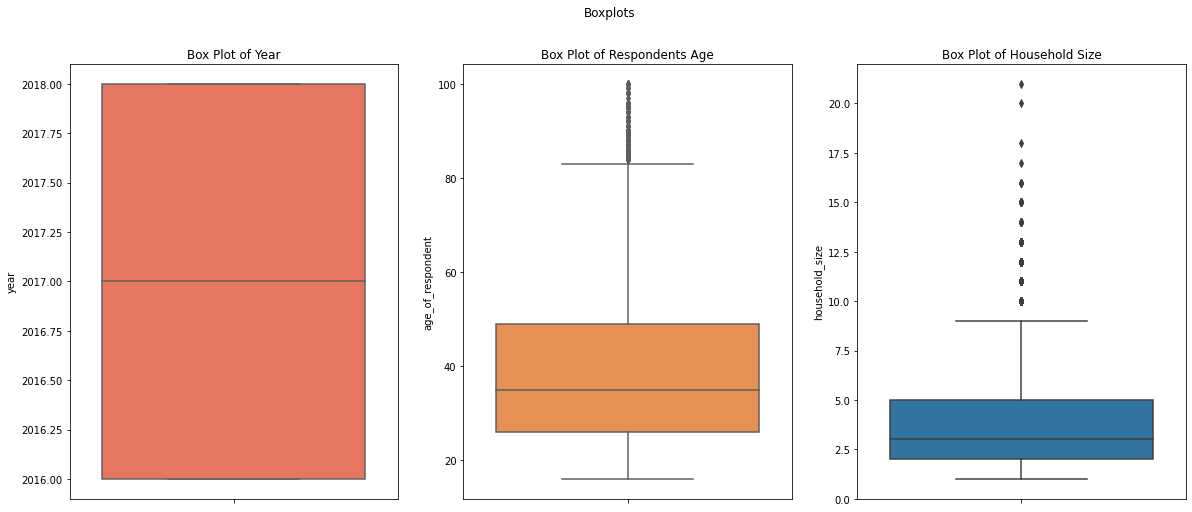

In [9]:
# Using box plots to check for potential outliers and the skewness of the data

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')

sns.boxplot(data=df, y = "year", ax=ax[0], palette="Reds")
ax[0].set_title('Box Plot of Year')

sns.boxplot(data=df, y = "age_of_respondent", ax=ax[1], palette="Oranges")
ax[1].set_title('Box Plot of Respondents Age')

sns.boxplot(data=df, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

The age of respondents has a few outliners.

The household size box plot suggest that the household size are relatively close with each other. 

In [10]:
# Checking for missing data

np.count_nonzero(df.isnull())
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

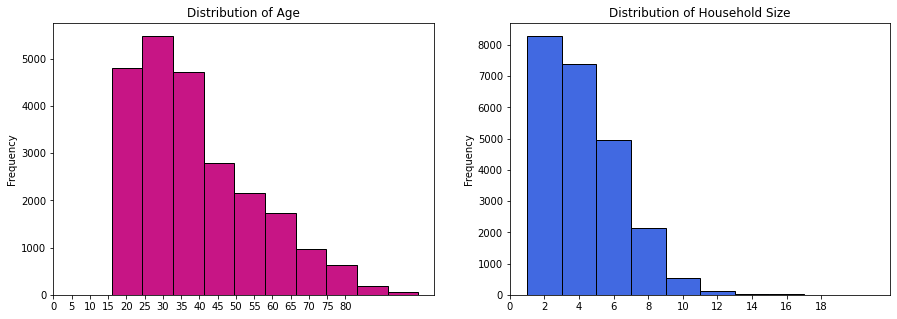

In [11]:
# Plotting a histogram to show the distribution of age and household size 

fig, ax=plt.subplots(1,2,figsize=(15,5))
df['age_of_respondent'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='mediumvioletred')

ax[0].set_title('Distribution of Age')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df['household_size'].plot.hist(ax=ax[1], color='royalblue', bins=10, edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2 = list(range(0,20,2))
ax[1].set_xticks(x2)

plt.show()

Here we can see that a lot of the respondent's age is approximately between 16 and 42.

And most household size falls between 1 and 5 with a few outliers.

## 2 Check if the target variable is balanced

In [12]:
# Using value_counts to check if the target is balanced 

df.value_counts('bank_account')

bank_account
No     20212
Yes     3312
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bank Account Status')

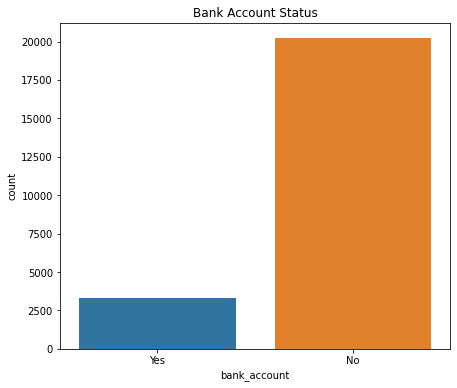

In [13]:
# Using bar chart to check if the target is balanced 

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.countplot('bank_account', data=df, ax=ax)
ax.set_title('Bank Account Status')

### We can see clearly that the dataset is imbalanced.
### It is important to use a balanced dataset.
### I will be using SMOTE method from sklearn.utils to oversample the minority class (later)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


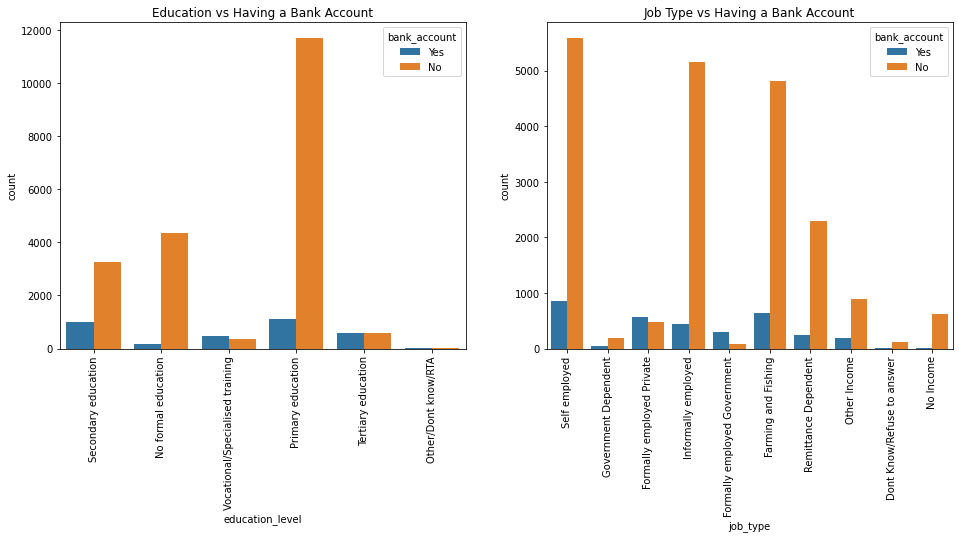

In [14]:
# Comparing education level and Job Type vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('education_level',hue='bank_account',data=df,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('job_type',hue='bank_account',data=df,ax=ax[1])
ax[1].set_title('Job Type vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

In [15]:
# Our models will be expecting numerical features; we need to change some categorical features to numeric

encode = {"bank_account": {"Yes":1, "No":0}, 
          "gender_of_respondent": {"Male":1, "Female":0},
          "cellphone_access":{"Yes":1,"No":0}, 
          "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}

In [16]:
df.replace(encode, inplace = True)
df.sample(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
8874,Rwanda,2016,uniqueid_2807,0,1,0,3,60,0,0,3,1,Other Income
4311,Kenya,2018,uniqueid_4312,0,1,1,3,26,0,3,0,1,Self employed
19242,Tanzania,2017,uniqueid_4440,0,1,1,1,28,0,0,0,1,Formally employed Private
2774,Kenya,2018,uniqueid_2775,1,0,1,3,47,0,3,0,3,Farming and Fishing
14550,Rwanda,2016,uniqueid_8483,1,1,1,2,33,1,0,0,2,Self employed
10869,Rwanda,2016,uniqueid_4802,0,1,1,4,23,0,3,0,1,Farming and Fishing
7764,Rwanda,2016,uniqueid_1697,0,1,1,6,34,1,0,0,1,Farming and Fishing
21038,Tanzania,2017,uniqueid_6236,0,1,1,1,20,0,0,1,1,Self employed
4166,Kenya,2018,uniqueid_4167,0,0,1,4,71,0,0,2,1,Farming and Fishing
12435,Rwanda,2016,uniqueid_6368,0,1,1,7,42,0,3,0,2,Farming and Fishing


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.3+ MB


In [18]:
# # Updating data types accordingly

# df['education_level'] = df['education_level'].astype(str).astype(int)
# df['relationship_with_head'] = df['relationship_with_head'].astype(str).astype(int)
# df['marital_status'] = df['marital_status'].astype(str).astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.3+ MB


In [20]:
# Dropping unncessary columns

df.drop(['uniqueid', 'country', 'job_type', 'year', ], axis=1, inplace=True)

In [21]:
df.sample(10)

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
8046,0,1,1,5,30,1,0,0,1
22590,0,1,1,3,51,0,3,0,1
285,0,1,1,6,38,0,0,0,1
19990,0,0,1,3,60,0,1,3,1
23020,0,0,1,7,48,0,0,0,2
19656,0,1,1,2,64,0,0,3,1
11897,1,1,1,6,28,0,3,0,1
12900,0,1,1,5,31,0,3,0,0
2023,0,1,1,3,68,1,0,0,0
8820,0,1,1,4,71,1,0,0,0


In [22]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

X = df.drop('bank_account', 1)
y = df['bank_account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


## Preprocessing
### Creating the feature set (X) and labels (y)

In [23]:
X.shape

(23524, 8)

In [24]:
y.shape

(23524,)

In [25]:
X.head()

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
0,1,1,3,24,0,3,0,2
1,1,0,5,70,0,0,3,0
2,0,1,5,26,1,4,1,3
3,1,1,5,34,0,0,0,1
4,0,0,8,26,1,1,1,1


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [27]:
# Splitting the dataset into the Training set and Test set
# we shall define the size of the test data as 20% of entire dataset

# from imblearn.over_sampling import SMOTE
# X, y = SMOTE().fit_resample(X, y)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)